# Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from scipy import stats
sns.set(style = "white",color_codes = True)

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_transactions = pd.read_csv('../input/final-project-ds/transactions.csv')
df_customer = pd.read_csv('../input/final-project-ds/customer.csv')

In [4]:
df_transaction = pd.read_csv('../input/final-project-ds/transactions.csv')

# Feature Engineering

In [5]:
df_transactions

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


In [6]:
df_transactions['product_metadata'] = df_transactions['product_metadata'].replace({'\[{':'','\}]':'','\'':'','\:':',','\{':'','\},':';'}, regex=True)

In [7]:
df=df_transactions[['product_metadata']]

In [8]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [9]:
df_transactions=explode(df_transactions.assign(product_metadata=df_transactions['product_metadata'].str.split(';')), 'product_metadata')

In [10]:
df_transactions[['id_n','product_id','q_n','quantity','p_n','item_price']] = df_transactions.product_metadata.str.split(",", expand=True)
df_transactions=df_transactions.drop(columns = ['id_n', 'q_n', 'p_n'])
df_transactions.head(20)

,booking_id,created_at,customer_id,payment_method,payment_status,promo_amount,promo_code,session_id,shipment_date_limit,shipment_fee,shipment_location_lat,shipment_location_long,total_amount,product_metadata,product_id,quantity,item_price
0,186e2bee-0637-4710-8981-50c2d737bc42,2018-07-29T15:22:01.458193Z,5868,Debit Card,Success,1415,WEEKENDSERU,3abaa6ce-e320-4e51-9469-d9f3fa328e86,2018-08-03T05:07:24.812676Z,10000,-8.227893,111.969107,199832,"product_id, 54728, quantity, 1, item_price, 19...",54728,1,191247
1,caadb57b-e808-4f94-9e96-8a7d4c9898db,2018-07-30T12:40:22.365620Z,4774,Credit Card,Success,0,NaN,2ee5ead1-f13e-4759-92df-7ff48475e970,2018-08-03T01:29:03.415705Z,10000,3.013470,107.802514,155526,"product_id, 16193, quantity, 1, item_price, 14...",16193,1,145526
2,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,2018-09-15T11:51:17.365620Z,4774,OVO,Success,0,NaN,93325fb6-eb00-4268-bb0e-6471795a0ad0,2018-09-18T08:41:49.422380Z,10000,-2.579428,115.743885,550696,"product_id, 53686, quantity, 4, item_price, 13...",53686,4,135174
3,f5e530a7-4350-4cd1-a3bc-525b5037bcab,2018-11-01T11:23:48.365620Z,4774,Credit Card,Success,0,NaN,bcad5a61-1b67-448d-8ff4-781d67bc56e4,2018-11-05T17:42:27.954235Z,0,-3.602334,120.363824,271012,"product_id, 20228, quantity, 1, item_price, 27...",20228,1,271012
4,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,2018-12-18T11:20:30.365620Z,4774,Credit Card,Success,0,NaN,df1042ab-13e6-4072-b9d2-64a81974c51a,2018-12-23T17:24:07.361785Z,0,-3.602334,120.363824,198753,"product_id, 55220, quantity, 1, item_price, 19...",55220,1,198753
5,1ed58c46-67fb-4386-924b-983c74ccb4d7,2019-02-03T11:25:55.365620Z,4774,Debit Card,Success,6369,WEEKENDMANTAP,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,2019-02-07T10:41:59.997463Z,5000,-3.602334,120.363824,181865,"product_id, 59620, quantity, 1, item_price, 18...",59620,1,183234
6,c0ced313-e6b1-4a2a-b21f-347eccda5f96,2019-03-22T11:53:02.365620Z,4774,Credit Card,Success,0,NaN,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,2019-03-27T14:40:13.181562Z,10000,-7.712608,110.502877,306599,"product_id, 53136, quantity, 1, item_price, 29...",53136,1,296599
7,0ed6730f-a5db-4e40-9a54-c343474d872c,2019-05-08T11:29:21.365620Z,4774,Credit Card,Success,0,NaN,e7eff973-b499-4b8d-9892-89e67e5fd7d4,2019-05-10T20:09:58.104955Z,10000,3.293114,98.857043,153913,"product_id, 14142, quantity, 1, item_price, 14...",14142,1,143913
8,6edd9366-4788-4bbb-ae5b-744e45e6118d,2019-06-24T12:08:52.365620Z,4774,Credit Card,Success,4019,AZ2022,0d20c278-e082-4f28-9afe-8b5907d7a284,2019-06-28T10:34:36.588498Z,10000,-6.126016,106.779552,370757,"product_id, 12282, quantity, 1, item_price, 36...",12282,1,364776
9,771665e9-7df2-41c8-8168-16d5cdd407a1,2019-08-10T12:14:24.365620Z,4774,Credit Card,Success,9072,WEEKENDSERU,f5352cdc-0e3c-4e77-af42-645501dcded4,2019-08-14T18:07:04.125993Z,10000,-0.992004,114.438739,1295740,"product_id, 53051, quantity, 1, item_price, 29...",53051,1,292052


In [11]:
df = df_customer.merge(df_transaction, on='customer_id', how='right')
df.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526


In [12]:
df_ct = df[['customer_id','first_join_date','created_at']]
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      852584 non-null  int64 
 1   first_join_date  852584 non-null  object
 2   created_at       852584 non-null  object
dtypes: int64(1), object(2)
memory usage: 26.0+ MB


In [13]:
df_ct = df_ct.sort_values('created_at').groupby('customer_id').tail(1)

In [14]:
# # One Hot Encoding Kolom payment_method
# df_m = pd.concat([df_m, pd.get_dummies(df_m.payment_method, prefix='payment_method')], axis=1)
# df_m

In [15]:
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-11-01T11:23:48.365620Z,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-12-18T11:20:30.365620Z,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,25121,Himawan,Kurniawan,ef7a59f0-f5d4-42b5-85f5-82e093c733cf,ef7a59f0_f5d4_42b5_85f5_82e093c733cf@startupca...,M,1993-05-19,Android,4e168860-5c6f-4fa3-a0a7-5b10ff9b0bab,Android 2.2.1,-6.869535,111.077145,Jawa Tengah,Indonesia,2020-11-12,2021-09-21T22:10:05.074873Z,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,34829,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582053d8-d444-427b-9e9a-e12bbc54b1d8,Android 2.3,-2.266407,120.415779,Sulawesi Selatan,Indonesia,2021-12-08,2021-12-09T07:35:18.222046Z,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,99645,Tania,Palastri,f09d115a-a950-451e-9c4f-de117a2657f4,f09d115a_a950_451e_9c4f_de117a2657f4@zakyfound...,F,1991-03-17,Android,91ac

In [16]:
# One Hot Encoding Kolom payment_method
df = pd.concat([df, pd.get_dummies(df.payment_method, prefix='payment_method')], axis=1)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,0,1,0,0,0
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,1,0,0,0,0
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,0,0,0,0,1
3,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-11-01T11:23:48.365620Z,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,1,0,0,0,0
4,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-12-18T11:20:30.365620Z,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,25121,Himawan,Kurniawan,ef7a59f0-f5d4-42b5-85f5-82e093c733cf,ef7a59f0_f5d4_42b5_85f5_82e093c733cf@startupca...,M,1993-05-19,Android,4e168860-5c6f-4fa3-a0a7-5b10ff9b0bab,Android 2.2.1,-6.869535,111.077145,Jawa Tengah,Indonesia,2020-11-12,2021-09-21T22:10:05.074873Z,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,0,1,0,0,0
852580,34829,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582053d8-d444-427b-9e9a-e12bbc54b1d8,Android 2.3,-2.266407,120.415779,Sulawesi Selatan,Indonesia,2021-12-08,2021-12-09T07:35:18.222046Z,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,

In [17]:
df = pd.concat([df, pd.get_dummies(df.promo_code, prefix='promo_code')], axis=1)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,0,1,0,0,0,0,0,0,0,0,0,1,0
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-11-01T11:23:48.365620Z,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-12-18T11:20:30.365620Z,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,25121,Himawan,Kurniawan,ef7a59f0-f5d4-42b5-85f5-82e093c733cf,ef7a59f0_f5d4_42b5_85f5_82e093c733cf@startupca...,M,1993-05-19,Android,4e168860-5c6f-4fa3-a0a7-5b10ff9b0bab,Android 2.2.1,-6.869535,111.077145,Jawa Tengah,Indonesia,2020-11-12,2021-09-21T22:10:05.074873Z,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,0,1,0,0,0,0,0,0,0,0,0,0,0
852580,34829,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582

In [18]:
# Label Encoding Kolom payment_status
payment_status = {'Success': 1, 'Failed': 0}
df['payment_status'] = df['payment_status'].map(payment_status)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,1,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,0,1,0,0,0,0,0,0,0,0,0,1,0
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,1,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,1,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-11-01T11:23:48.365620Z,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,1,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-12-18T11:20:30.365620Z,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,1,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,25121,Himawan,Kurniawan,ef7a59f0-f5d4-42b5-85f5-82e093c733cf,ef7a59f0_f5d4_42b5_85f5_82e093c733cf@startupca...,M,1993-05-19,Android,4e168860-5c6f-4fa3-a0a7-5b10ff9b0bab,Android 2.2.1,-6.869535,111.077145,Jawa Tengah,Indonesia,2020-11-12,2021-09-21T22:10:05.074873Z,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,0,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,0,1,0,0,0,0,0,0,0,0,0,0,0
852580,34829,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582053d8-d444-427b-9e9a-e12bbc54b1d8,A

In [19]:
df_PST = df[['customer_id','payment_status']]
df_PST['payment_status'] = df_PST.groupby('customer_id')['payment_status'].transform('mean')
df_PST=df_PST.drop_duplicates('customer_id')
df_PST

,customer_id,payment_status
0,5868,1.000000
1,4774,1.000000
32,58191,0.979381
129,81104,1.000000
130,47040,1.000000
...,...,...
852578,25121,0.500000
852580,34829,1.000000
852581,99645,1.000000
852582,87319,1.000000


In [20]:
df_PA = df[['customer_id','promo_amount']]
df_PA['promo_amount'] = df_PA.groupby('customer_id')['promo_amount'].transform('mean')
df_PA=df_PA.drop_duplicates('customer_id')
df_PA

,customer_id,promo_amount
0,5868,1415.000000
1,4774,2129.161290
32,58191,1814.917526
129,81104,0.000000
130,47040,3482.666667
...,...,...
852578,25121,0.000000
852580,34829,5010.000000
852581,99645,2181.000000
852582,87319,4503.000000


In [21]:
df_PMC = df[['customer_id','payment_method_Credit Card']]
df_PMC['payment_method_Credit_Card'] = df_PMC.groupby('customer_id')['payment_method_Credit Card'].transform('sum')
df_PMC=df_PMC.drop_duplicates('customer_id')
df_PMC

,customer_id,payment_method_Credit Card,payment_method_Credit_Card
0,5868,0,0.0
1,4774,1,24.0
32,58191,0,1.0
129,81104,0,0.0
130,47040,0,0.0
...,...,...,...
852578,25121,0,0.0
852580,34829,0,0.0
852581,99645,1,1.0
852582,87319,1,1.0


In [22]:
# pmdc = payment methods debit card
df_PMDC = df[['customer_id','payment_method_Debit Card']]
df_PMDC['payment_method_Debit_Card'] = df_PMDC.groupby('customer_id')['payment_method_Debit Card'].transform('sum')
df_PMDC=df_PMDC.drop_duplicates('customer_id')
df_PMDC

,customer_id,payment_method_Debit Card,payment_method_Debit_Card
0,5868,1,1.0
1,4774,0,3.0
32,58191,0,1.0
129,81104,0,0.0
130,47040,0,0.0
...,...,...,...
852578,25121,1,2.0
852580,34829,0,0.0
852581,99645,0,0.0
852582,87319,0,0.0


In [23]:
# payment methods gopay
df_PMG = df[['customer_id','payment_method_Gopay']]
df_PMG['payment_method_Gopay'] = df_PMG.groupby('customer_id')['payment_method_Gopay'].transform('sum')
df_PMG=df_PMG.drop_duplicates('customer_id')
df_PMG

,customer_id,payment_method_Gopay
0,5868,0.0
1,4774,1.0
32,58191,9.0
129,81104,0.0
130,47040,0.0
...,...,...
852578,25121,0.0
852580,34829,0.0
852581,99645,0.0
852582,87319,0.0


In [24]:
# payment methods linkaja
df_PMLA = df[['customer_id','payment_method_LinkAja']]
df_PMLA['payment_method_LinkAja'] = df_PMLA.groupby('customer_id')['payment_method_LinkAja'].transform('sum')
df_PMLA=df_PMLA.drop_duplicates('customer_id')
df_PMLA

,customer_id,payment_method_LinkAja
0,5868,0.0
1,4774,2.0
32,58191,0.0
129,81104,0.0
130,47040,1.0
...,...,...
852578,25121,0.0
852580,34829,0.0
852581,99645,0.0
852582,87319,0.0


In [25]:
# payment methods ovo
df_PMO = df[['customer_id','payment_method_OVO']]
df_PMO['payment_method_OVO'] = df_PMO.groupby('customer_id')['payment_method_OVO'].transform('sum')
df_PMO=df_PMO.drop_duplicates('customer_id')
df_PMO

,customer_id,payment_method_OVO
0,5868,0.0
1,4774,1.0
32,58191,86.0
129,81104,1.0
130,47040,2.0
...,...,...
852578,25121,0.0
852580,34829,1.0
852581,99645,0.0
852582,87319,0.0


In [26]:
df_PCAZ = df[['customer_id','promo_code_AZ2022']]
df_PCAZ['promo_code_AZ2022'] = df_PCAZ.groupby('customer_id')['promo_code_AZ2022'].transform('sum')
df_PCAZ=df_PCAZ.drop_duplicates('customer_id')
df_PCAZ

,customer_id,promo_code_AZ2022
0,5868,0
1,4774,5
32,58191,13
129,81104,0
130,47040,1
...,...,...
852578,25121,0
852580,34829,1
852581,99645,0
852582,87319,1


In [27]:
df_PCBY = df[['customer_id','promo_code_BUYMORE']]
df_PCBY['promo_code_BUYMORE'] = df_PCBY.groupby('customer_id')['promo_code_BUYMORE'].transform('sum')
df_PCBY=df_PCBY.drop_duplicates('customer_id')
df_PCBY

,customer_id,promo_code_BUYMORE
0,5868,0
1,4774,1
32,58191,5
129,81104,0
130,47040,0
...,...,...
852578,25121,0
852580,34829,0
852581,99645,0
852582,87319,0


In [28]:
df_PCLD = df[['customer_id','promo_code_LIBURDONG']]
df_PCLD['promo_code_LIBURDONG'] = df_PCLD.groupby('customer_id')['promo_code_LIBURDONG'].transform('sum')
df_PCLD=df_PCLD.drop_duplicates('customer_id')
df_PCLD

,customer_id,promo_code_LIBURDONG
0,5868,0
1,4774,2
32,58191,4
129,81104,0
130,47040,0
...,...,...
852578,25121,0
852580,34829,0
852581,99645,0
852582,87319,0


In [29]:
df_PCSC = df[['customer_id','promo_code_SC2022']]
df_PCSC['promo_code_SC2022'] = df_PCSC.groupby('customer_id')['promo_code_SC2022'].transform('sum')
df_PCSC=df_PCSC.drop_duplicates('customer_id')
df_PCSC

,customer_id,promo_code_SC2022
0,5868,0
1,4774,0
32,58191,0
129,81104,0
130,47040,0
...,...,...
852578,25121,0
852580,34829,0
852581,99645,0
852582,87319,0


In [30]:
df_PCST = df[['customer_id','promo_code_STARTUP']]
df_PCST['promo_code_STARTUP'] = df_PCST.groupby('customer_id')['promo_code_STARTUP'].transform('sum')
df_PCST=df_PCST.drop_duplicates('customer_id')
df_PCST

,customer_id,promo_code_STARTUP
0,5868,0
1,4774,0
32,58191,0
129,81104,0
130,47040,0
...,...,...
852578,25121,0
852580,34829,0
852581,99645,0
852582,87319,0


In [31]:
df_PCWM = df[['customer_id','promo_code_WEEKENDMANTAP']]
df_PCWM['promo_code_WEEKENDMANTAP'] = df_PCWM.groupby('customer_id')['promo_code_WEEKENDMANTAP'].transform('sum')
df_PCWM=df_PCWM.drop_duplicates('customer_id')
df_PCWM 

,customer_id,promo_code_WEEKENDMANTAP
0,5868,0
1,4774,1
32,58191,2
129,81104,0
130,47040,0
...,...,...
852578,25121,0
852580,34829,0
852581,99645,0
852582,87319,0


In [32]:
df_PCWS = df[['customer_id','promo_code_WEEKENDSERU']]
df_PCWS['promo_code_WEEKENDSERU'] = df_PCWS.groupby('customer_id')['promo_code_WEEKENDSERU'].transform('sum')
df_PCWS=df_PCWS.drop_duplicates('customer_id')
df_PCWS 

,customer_id,promo_code_WEEKENDSERU
0,5868,1
1,4774,2
32,58191,3
129,81104,0
130,47040,1
...,...,...
852578,25121,0
852580,34829,0
852581,99645,1
852582,87319,0


In [33]:
df_PCXX = df[['customer_id','promo_code_XX2022']]
df_PCXX['promo_code_XX2022'] = df_PCXX.groupby('customer_id')['promo_code_XX2022'].transform('sum')
df_PCXX=df_PCXX.drop_duplicates('customer_id')
df_PCXX 

,customer_id,promo_code_XX2022
0,5868,0
1,4774,1
32,58191,9
129,81104,0
130,47040,0
...,...,...
852578,25121,0
852580,34829,0
852581,99645,0
852582,87319,0


In [34]:
df_pm = df_PCXX.merge(df_PCWS, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCWM, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCST, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCSC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCLD, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCBY, on='customer_id', how='left')
df_pm = df_pm.merge(df_PCAZ, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMO, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMLA, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMG, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMDC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PMC, on='customer_id', how='left')
df_pm = df_pm.merge(df_PA, on='customer_id', how='left')
df_pm = df_pm.merge(df_PST, on='customer_id', how='left')

In [35]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 0 to 50704
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 50705 non-null  int64  
 1   promo_code_XX2022           50705 non-null  uint8  
 2   promo_code_WEEKENDSERU      50705 non-null  uint8  
 3   promo_code_WEEKENDMANTAP    50705 non-null  uint8  
 4   promo_code_STARTUP          50705 non-null  uint8  
 5   promo_code_SC2022           50705 non-null  uint8  
 6   promo_code_LIBURDONG        50705 non-null  uint8  
 7   promo_code_BUYMORE          50705 non-null  uint8  
 8   promo_code_AZ2022           50705 non-null  uint8  
 9   payment_method_OVO          50705 non-null  float64
 10  payment_method_LinkAja      50705 non-null  float64
 11  payment_method_Gopay        50705 non-null  float64
 12  payment_method_Debit Card   50705 non-null  uint8  
 13  payment_method_Debit_Card   507

In [36]:
df_pm.isnull().sum()

customer_id                   0
promo_code_XX2022             0
promo_code_WEEKENDSERU        0
promo_code_WEEKENDMANTAP      0
promo_code_STARTUP            0
promo_code_SC2022             0
promo_code_LIBURDONG          0
promo_code_BUYMORE            0
promo_code_AZ2022             0
payment_method_OVO            0
payment_method_LinkAja        0
payment_method_Gopay          0
payment_method_Debit Card     0
payment_method_Debit_Card     0
payment_method_Credit Card    0
payment_method_Credit_Card    0
promo_amount                  0
payment_status                0
dtype: int64

In [37]:
df_pm

,customer_id,promo_code_XX2022,promo_code_WEEKENDSERU,promo_code_WEEKENDMANTAP,promo_code_STARTUP,promo_code_SC2022,promo_code_LIBURDONG,promo_code_BUYMORE,promo_code_AZ2022,payment_method_OVO,payment_method_LinkAja,payment_method_Gopay,payment_method_Debit Card,payment_method_Debit_Card,payment_method_Credit Card,payment_method_Credit_Card,promo_amount,payment_status
0,5868,0,1,0,0,0,0,0,0,0.0,0.0,0.0,1,1.0,0,0.0,1415.000000,1.000000
1,4774,1,2,1,0,0,2,1,5,1.0,2.0,1.0,0,3.0,1,24.0,2129.161290,1.000000
2,58191,9,3,2,0,0,4,5,13,86.0,0.0,9.0,0,1.0,0,1.0,1814.917526,0.979381
3,81104,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0,0.0,0,0.0,0.000000,1.000000
4,47040,0,1,0,0,0,0,0,1,2.0,1.0,0.0,0,0.0,0,0.0,3482.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50700,25121,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1,2.0,0,0.0,0.000000,0.500000
50701,34829,0,0,0,0,0,0,0,1,1.0,0.0,0.0,0,0.0,0,0.0,5010.000000,1.000000
50702,99645,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,1,1.0,2181.000000,1.000000
50703,87319,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0,0.0,1,1.0,4503.000000,1.000000


In [38]:
df_pm.promo_code_XX2022.fillna(0, inplace = True)
df_pm.promo_code_WEEKENDSERU.fillna(0, inplace = True)
df_pm.promo_code_WEEKENDMANTAP.fillna(0, inplace = True)
df_pm.promo_code_STARTUP.fillna(0, inplace = True)
df_pm.promo_code_SC2022.fillna(0, inplace = True)
df_pm.promo_code_LIBURDONG.fillna(0, inplace = True)
df_pm.promo_code_BUYMORE.fillna(0, inplace = True)
df_pm.promo_code_AZ2022.fillna(0, inplace = True)
df_pm.payment_method_OVO.fillna(0, inplace = True)
df_pm.payment_method_LinkAja.fillna(0, inplace = True)
df_pm.payment_method_Gopay.fillna(0, inplace = True)
df_pm.payment_method_Debit_Card.fillna(0, inplace = True)
df_pm.payment_method_Credit_Card.fillna(0, inplace = True)
df_pm.promo_amount.fillna(0, inplace = True)
df_pm.payment_status.fillna(0, inplace = True)

In [39]:
df_pm.payment_status.fillna(0, inplace = True)

In [40]:
df_pm['promo_amount'].fillna(0, inplace = True)

In [41]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 0 to 50704
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 50705 non-null  int64  
 1   promo_code_XX2022           50705 non-null  uint8  
 2   promo_code_WEEKENDSERU      50705 non-null  uint8  
 3   promo_code_WEEKENDMANTAP    50705 non-null  uint8  
 4   promo_code_STARTUP          50705 non-null  uint8  
 5   promo_code_SC2022           50705 non-null  uint8  
 6   promo_code_LIBURDONG        50705 non-null  uint8  
 7   promo_code_BUYMORE          50705 non-null  uint8  
 8   promo_code_AZ2022           50705 non-null  uint8  
 9   payment_method_OVO          50705 non-null  float64
 10  payment_method_LinkAja      50705 non-null  float64
 11  payment_method_Gopay        50705 non-null  float64
 12  payment_method_Debit Card   50705 non-null  uint8  
 13  payment_method_Debit_Card   507

In [42]:
#yang bagus cuma promo amount sama payment status, jadi yg dipake itu doang
df_pm = df_pm[['customer_id','promo_amount','payment_status']]

In [43]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 0 to 50704
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     50705 non-null  int64  
 1   promo_amount    50705 non-null  float64
 2   payment_status  50705 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.5 MB


In [44]:
# error

In [45]:
# df_m

In [46]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 852495 to 669624
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      50705 non-null  int64 
 1   first_join_date  50705 non-null  object
 2   created_at       50705 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [47]:
df_ct['created_at']=df_ct['created_at'].fillna(df_ct['first_join_date'])

In [48]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 852495 to 669624
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      50705 non-null  int64 
 1   first_join_date  50705 non-null  object
 2   created_at       50705 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [49]:
df_ct['first_join_date'] = pd.to_datetime(df_ct['first_join_date'], infer_datetime_format=True, utc = True)

In [50]:
df_ct['created_at']=pd.to_datetime(df_ct['created_at'], format = '%Y-%m-%d ',utc=True)

In [51]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 852495 to 669624
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   customer_id      50705 non-null  int64              
 1   first_join_date  50705 non-null  datetime64[ns, UTC]
 2   created_at       50705 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(1)
memory usage: 1.5 MB


In [52]:
#durasi bertahan = jarak first join date ke terakhir beli
df_ct['durasi_bertahan'] = (df_ct['created_at'] - df_ct['first_join_date']).dt.days

In [53]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 852495 to 669624
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   customer_id      50705 non-null  int64              
 1   first_join_date  50705 non-null  datetime64[ns, UTC]
 2   created_at       50705 non-null  datetime64[ns, UTC]
 3   durasi_bertahan  50705 non-null  int64              
dtypes: datetime64[ns, UTC](2), int64(2)
memory usage: 1.9 MB


In [54]:
df_ct=df_ct.drop(columns =['first_join_date','created_at'])

In [55]:
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 852495 to 669624
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   customer_id      50705 non-null  int64
 1   durasi_bertahan  50705 non-null  int64
dtypes: int64(2)
memory usage: 1.2 MB


In [56]:
df_customer['first_join_date'] = pd.to_datetime(df_customer['first_join_date'], infer_datetime_format=True)
curr_time = pd.to_datetime("now")
df_customer['joins_duration']=(curr_time-df_customer['first_join_date']).dt.days
df_customer.head(2)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,joins_duration
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21,1235
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16,1970


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 852584 entries, 0 to 852583
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_id                 852584 non-null  int64  
 1   first_name                  852584 non-null  object 
 2   last_name                   852584 non-null  object 
 3   username                    852584 non-null  object 
 4   email                       852584 non-null  object 
 5   gender                      852584 non-null  object 
 6   birthdate                   852584 non-null  object 
 7   device_type                 852584 non-null  object 
 8   device_id                   852584 non-null  object 
 9   device_version              852584 non-null  object 
 10  home_location_lat           852584 non-null  float64
 11  home_location_long          852584 non-null  float64
 12  home_location               852584 non-null  object 
 13  home_country  

In [58]:
# recency ->  transactions.created_at
# frequency -> count(transactions.created_at) group by cust_id
# monetary -> sum(transactions.total_amount) group by cust_id
# total_items -> sum(transactions.quantity)
# total_price -> (item_price*quantity)
# total_freight_value -> shipment_fee
# total_order_value -> total_price + shipment_fee

df.frequency.isnull().sum()

In [59]:
# df["quantity"] = pd.to_numeric(df["quantity"])

In [60]:
# # total_items -> sum(transactions.quantity)
# df_ti = df[['customer_id','quantity']]
# df_ti['quantity'] = df_ti.groupby('customer_id')['quantity'].transform('sum')
# df_ti=df_ti.drop_duplicates('customer_id')
# df_ti

In [61]:
# df["item_price"] = pd.to_numeric(df["item_price"])
# df["quantity"] = pd.to_numeric(df["quantity"])

In [62]:
# df_tp = df[['customer_id','item_price']]

In [63]:
# df_tp['total_price'] = df_tp.groupby('customer_id')['item_price'].transform('sum')
# df_tp = df_tp.drop_duplicates('customer_id')
# df_tp=df_tp.drop(columns = ['item_price'])
# df_tp

In [64]:
# df_tp

In [65]:
# total_order_value -> total_price + shipment_fee
df_tov = df[['customer_id','total_amount','promo_amount']]
df_tov['total_order_value'] = df_tov['total_amount'] - df_tov['promo_amount']
df_tov['total_order_value'] = df_tov.groupby('customer_id')['total_order_value'].transform('sum')
df_tov=df_tov.drop_duplicates('customer_id')
df_tov=df_tov.drop(columns = ['total_amount','promo_amount'])
df_tov

,customer_id,total_order_value
0,5868,198417
1,4774,14972698
32,58191,47377604
129,81104,195705
130,47040,534856
...,...,...
852578,25121,514508
852580,34829,354193
852581,99645,1155978
852582,87319,179640


In [66]:
df_fv = df[['customer_id','shipment_fee']]
df_fv['shipment_fee'] = df_fv.groupby('customer_id')['shipment_fee'].transform('sum')
df_fv=df_fv.drop_duplicates('customer_id')
df_fv

,customer_id,shipment_fee
0,5868,10000
1,4774,285000
32,58191,1015000
129,81104,10000
130,47040,45000
...,...,...
852578,25121,10000
852580,34829,10000
852581,99645,5000
852582,87319,0


In [67]:
df_frequency=df[['customer_id','created_at']]
df_frequency['created_at']=  pd.to_datetime(df_frequency['created_at'],infer_datetime_format=True )
df_frequency['freq'] = 2**(-0.05*((df_frequency['created_at'].max() - df_frequency['created_at']).dt.days))
df_frequency['freq'] = df_frequency.groupby('customer_id')['freq'].transform('sum')
df_frequency=df_frequency.drop_duplicates('customer_id')
df_frequency=df_frequency.drop(columns=['created_at'])
# df_frequency1=df_customer['customer_id']
# df_frequency=df_frequency.merge(df_frequency1, on = 'customer_id', how = 'right')
# df_frequency.fillna(0, inplace=True)
df_frequency

,customer_id,freq
0,5868,9.542360e-23
1,4774,2.051846e-01
32,58191,1.111567e+00
129,81104,9.217313e-23
130,47040,4.676486e-08
...,...,...
852578,25121,1.944863e-05
852580,34829,3.005724e-04
852581,99645,3.221455e-04
852582,87319,4.080996e-15


In [68]:
#monetary -> total spending user
df_monetary=df_transaction[['customer_id','total_amount']]
df_monetary['monetary'] = df_monetary.groupby('customer_id')['total_amount'].transform('sum')
df_monetary=df_monetary.drop_duplicates('customer_id')
df_monetary=df_monetary.drop(columns = ['total_amount'])
df_monetary1=df_customer['customer_id']
df_monetary=df_monetary.merge(df_monetary1, on = 'customer_id', how = 'right')
df_monetary.fillna(0, inplace = True)
df

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,created_at,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,payment_method_Credit Card,payment_method_Debit Card,payment_method_Gopay,payment_method_LinkAja,payment_method_OVO,promo_code_AZ2022,promo_code_BUYMORE,promo_code_LIBURDONG,promo_code_SC2022,promo_code_STARTUP,promo_code_WEEKENDMANTAP,promo_code_WEEKENDSERU,promo_code_XX2022
0,5868,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2018-07-29T15:22:01.458193Z,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,1,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,0,1,0,0,0,0,0,0,0,0,0,1,0
1,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-07-30T12:40:22.365620Z,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,1,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-09-15T11:51:17.365620Z,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,1,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-11-01T11:23:48.365620Z,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,1,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4774,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,2018-12-18T11:20:30.365620Z,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,1,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,25121,Himawan,Kurniawan,ef7a59f0-f5d4-42b5-85f5-82e093c733cf,ef7a59f0_f5d4_42b5_85f5_82e093c733cf@startupca...,M,1993-05-19,Android,4e168860-5c6f-4fa3-a0a7-5b10ff9b0bab,Android 2.2.1,-6.869535,111.077145,Jawa Tengah,Indonesia,2020-11-12,2021-09-21T22:10:05.074873Z,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,0,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,0,1,0,0,0,0,0,0,0,0,0,0,0
852580,34829,Salwa,Prastuti,46d47eaa-4d8a-4f17-b083-48c2ad4fe947,46d47eaa_4d8a_4f17_b083_48c2ad4fe947@zakyfound...,F,2006-04-21,Android,582053d8-d444-427b-9e9a-e12bbc54b1d8,A

In [69]:
#recency -> jarak terakhir beli
df_recency = df[['customer_id','created_at']]
df_recency = df_recency.sort_values('created_at').groupby('customer_id').tail(1)
df_recency.reset_index(drop = True, inplace = True)

In [70]:
df_recency

,customer_id,created_at
0,73773,2016-07-01T22:32:45.218400Z
1,30771,2016-07-02T20:01:04.996529Z
2,67563,2016-07-03T16:25:01.401472Z
3,22844,2016-07-04T00:58:13.525069Z
4,9914,2016-07-04T18:10:42.766218Z
...,...,...
50700,15753,2022-07-31T23:58:06.292816Z
50701,27522,2022-07-31T23:58:07.937208Z
50702,81975,2022-07-31T23:58:50.469277Z
50703,22285,2022-07-31T23:59:03.408424Z


In [71]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  50705 non-null  int64 
 1   created_at   50705 non-null  object
dtypes: int64(1), object(1)
memory usage: 792.4+ KB


In [72]:
df_recency[df_recency['customer_id']==56781]

,customer_id,created_at


In [73]:
df_recency['created_at'] = pd.to_datetime(df_recency['created_at'], infer_datetime_format=True)

In [74]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  50705 non-null  int64         
 1   created_at   50705 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 792.4 KB


In [75]:
df_recency['created_at'].max()-df_recency[df_recency['customer_id']==56781]['created_at']

Series([], Name: created_at, dtype: timedelta64[ns])

In [76]:
df_recency['recency'] = (df_recency['created_at'].max() - df_recency['created_at']).dt.days
df_recency=df_recency.drop(columns = ['created_at'])
df_recency

,customer_id,recency
0,73773,2221
1,30771,2220
2,67563,2219
3,22844,2218
4,9914,2218
...,...,...
50700,15753,0
50701,27522,0
50702,81975,0
50703,22285,0


In [77]:
df_recency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  50705 non-null  int64
 1   recency      50705 non-null  int64
dtypes: int64(2)
memory usage: 792.4 KB


In [78]:
df_recency.recency.fillna(2222, inplace = True)

In [79]:
df_recency.describe()

,customer_id,recency
count,50705.000000,50705.000000
mean,49810.881353,299.083167
std,28957.608061,436.187140
min,3.000000,0.000000
25%,24694.000000,39.000000
50%,49712.000000,110.000000
75%,74863.000000,359.000000
max,99999.000000,2221.000000


In [80]:
df_recency.isnull().sum()

customer_id    0
recency        0
dtype: int64

In [81]:
# df_m = df_ti.merge(df_tp, on='customer_id', how='left')
# df_m = df_m.merge(df_tov, on='customer_id', how='left')
df_m = df_tov.merge(df_frequency, on='customer_id', how='left')
df_m = df_m.merge(df_monetary, on='customer_id', how='left')
df_m = df_m.merge(df_recency, on='customer_id', how='left')
df_m = df_m.merge(df_ct, on='customer_id', how='left')

In [82]:
# error

In [83]:
df_m

,customer_id,total_order_value,freq,monetary,recency,durasi_bertahan
0,5868,198417,9.542360e-23,199832.0,1463,1
1,4774,14972698,2.051846e-01,15038702.0,52,1412
2,58191,47377604,1.111567e+00,47553651.0,23,1441
3,81104,195705,9.217313e-23,195705.0,1464,0
4,47040,534856,4.676486e-08,545304.0,487,977
...,...,...,...,...,...,...
50700,25121,514508,1.944863e-05,514508.0,313,313
50701,34829,354193,3.005724e-04,359203.0,234,1
50702,99645,1155978,3.221455e-04,1158159.0,232,3
50703,87319,179640,4.080996e-15,184143.0,956,0


In [84]:
# df_m

In [85]:
df_ct

,customer_id,durasi_bertahan
852495,73773,1
833732,30771,0
554873,67563,0
833685,22844,2
745671,9914,0
...,...,...
669675,15753,0
669872,27522,0
669666,81975,0
669776,22285,0


In [86]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 0 to 50704
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50705 non-null  int64  
 1   total_order_value  50705 non-null  int64  
 2   freq               50705 non-null  float64
 3   monetary           50705 non-null  float64
 4   recency            50705 non-null  int64  
 5   durasi_bertahan    50705 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.7 MB


In [87]:
# error

In [88]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 0 to 50704
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        50705 non-null  int64  
 1   total_order_value  50705 non-null  int64  
 2   freq               50705 non-null  float64
 3   monetary           50705 non-null  float64
 4   recency            50705 non-null  int64  
 5   durasi_bertahan    50705 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.7 MB


In [89]:
# df_m=df_m.drop(columns = ['customer_id'])

In [90]:
df_m=df_m.reset_index()

In [91]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              50705 non-null  int64  
 1   customer_id        50705 non-null  int64  
 2   total_order_value  50705 non-null  int64  
 3   freq               50705 non-null  float64
 4   monetary           50705 non-null  float64
 5   recency            50705 non-null  int64  
 6   durasi_bertahan    50705 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 2.7 MB


In [92]:
# df_m['freq']=df_m['freq']*2**(-0.05*df_m['recency'])

In [93]:
def is_churn(x):
    if x > 30:
        return True
    else: 
        return False

In [94]:
df_m['is_churn'] = df_m['recency'].apply(lambda x : is_churn(x))

In [95]:
df_m["is_churn"] = df_m["is_churn"].astype(int)

In [96]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50705 entries, 0 to 50704
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              50705 non-null  int64  
 1   customer_id        50705 non-null  int64  
 2   total_order_value  50705 non-null  int64  
 3   freq               50705 non-null  float64
 4   monetary           50705 non-null  float64
 5   recency            50705 non-null  int64  
 6   durasi_bertahan    50705 non-null  int64  
 7   is_churn           50705 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.1 MB


In [97]:
df_m=df_m.drop(columns = ['recency'])

In [98]:
df_final = df_m.merge(df_pm, on='customer_id', how='left')

In [99]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50705 entries, 0 to 50704
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              50705 non-null  int64  
 1   customer_id        50705 non-null  int64  
 2   total_order_value  50705 non-null  int64  
 3   freq               50705 non-null  float64
 4   monetary           50705 non-null  float64
 5   durasi_bertahan    50705 non-null  int64  
 6   is_churn           50705 non-null  int64  
 7   promo_amount       50705 non-null  float64
 8   payment_status     50705 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.9 MB


In [100]:
df_final = df_final.merge(df_fv, on='customer_id', how='left')

In [101]:
df_final=df_final.drop(columns = ['customer_id'])

In [102]:
df_final=df_final.drop(columns = ['index'])

In [103]:
df_final

,total_order_value,freq,monetary,durasi_bertahan,is_churn,promo_amount,payment_status,shipment_fee
0,198417,9.542360e-23,199832.0,1,1,1415.000000,1.000000,10000
1,14972698,2.051846e-01,15038702.0,1412,1,2129.161290,1.000000,285000
2,47377604,1.111567e+00,47553651.0,1441,0,1814.917526,0.979381,1015000
3,195705,9.217313e-23,195705.0,0,1,0.000000,1.000000,10000
4,534856,4.676486e-08,545304.0,977,1,3482.666667,1.000000,45000
...,...,...,...,...,...,...,...,...
50700,514508,1.944863e-05,514508.0,313,1,0.000000,0.500000,10000
50701,354193,3.005724e-04,359203.0,1,1,5010.000000,1.000000,10000
50702,1155978,3.221455e-04,1158159.0,3,1,2181.000000,1.000000,5000
50703,179640,4.080996e-15,184143.0,0,1,4503.000000,1.000000,0


In [104]:
# error

In [105]:
# df_pm = df_pm.merge(df_PST, on='customer_id', how='left')

# Imbalanced Data, Outlier, and Correlation Matrix

<AxesSubplot:xlabel='is_churn', ylabel='count'>

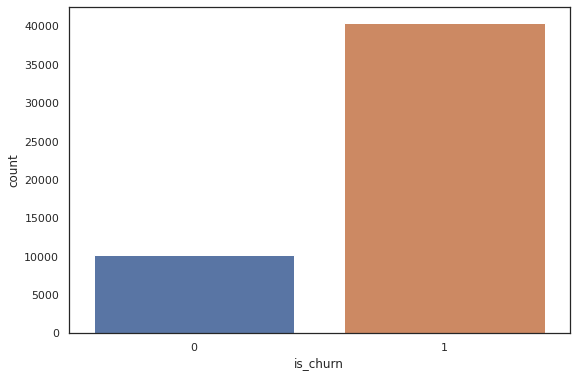

In [106]:
# Imbalance Data

# Observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(df_final.is_churn)

#The imbalanced data is solved by using stratified k-fold

<AxesSubplot:>

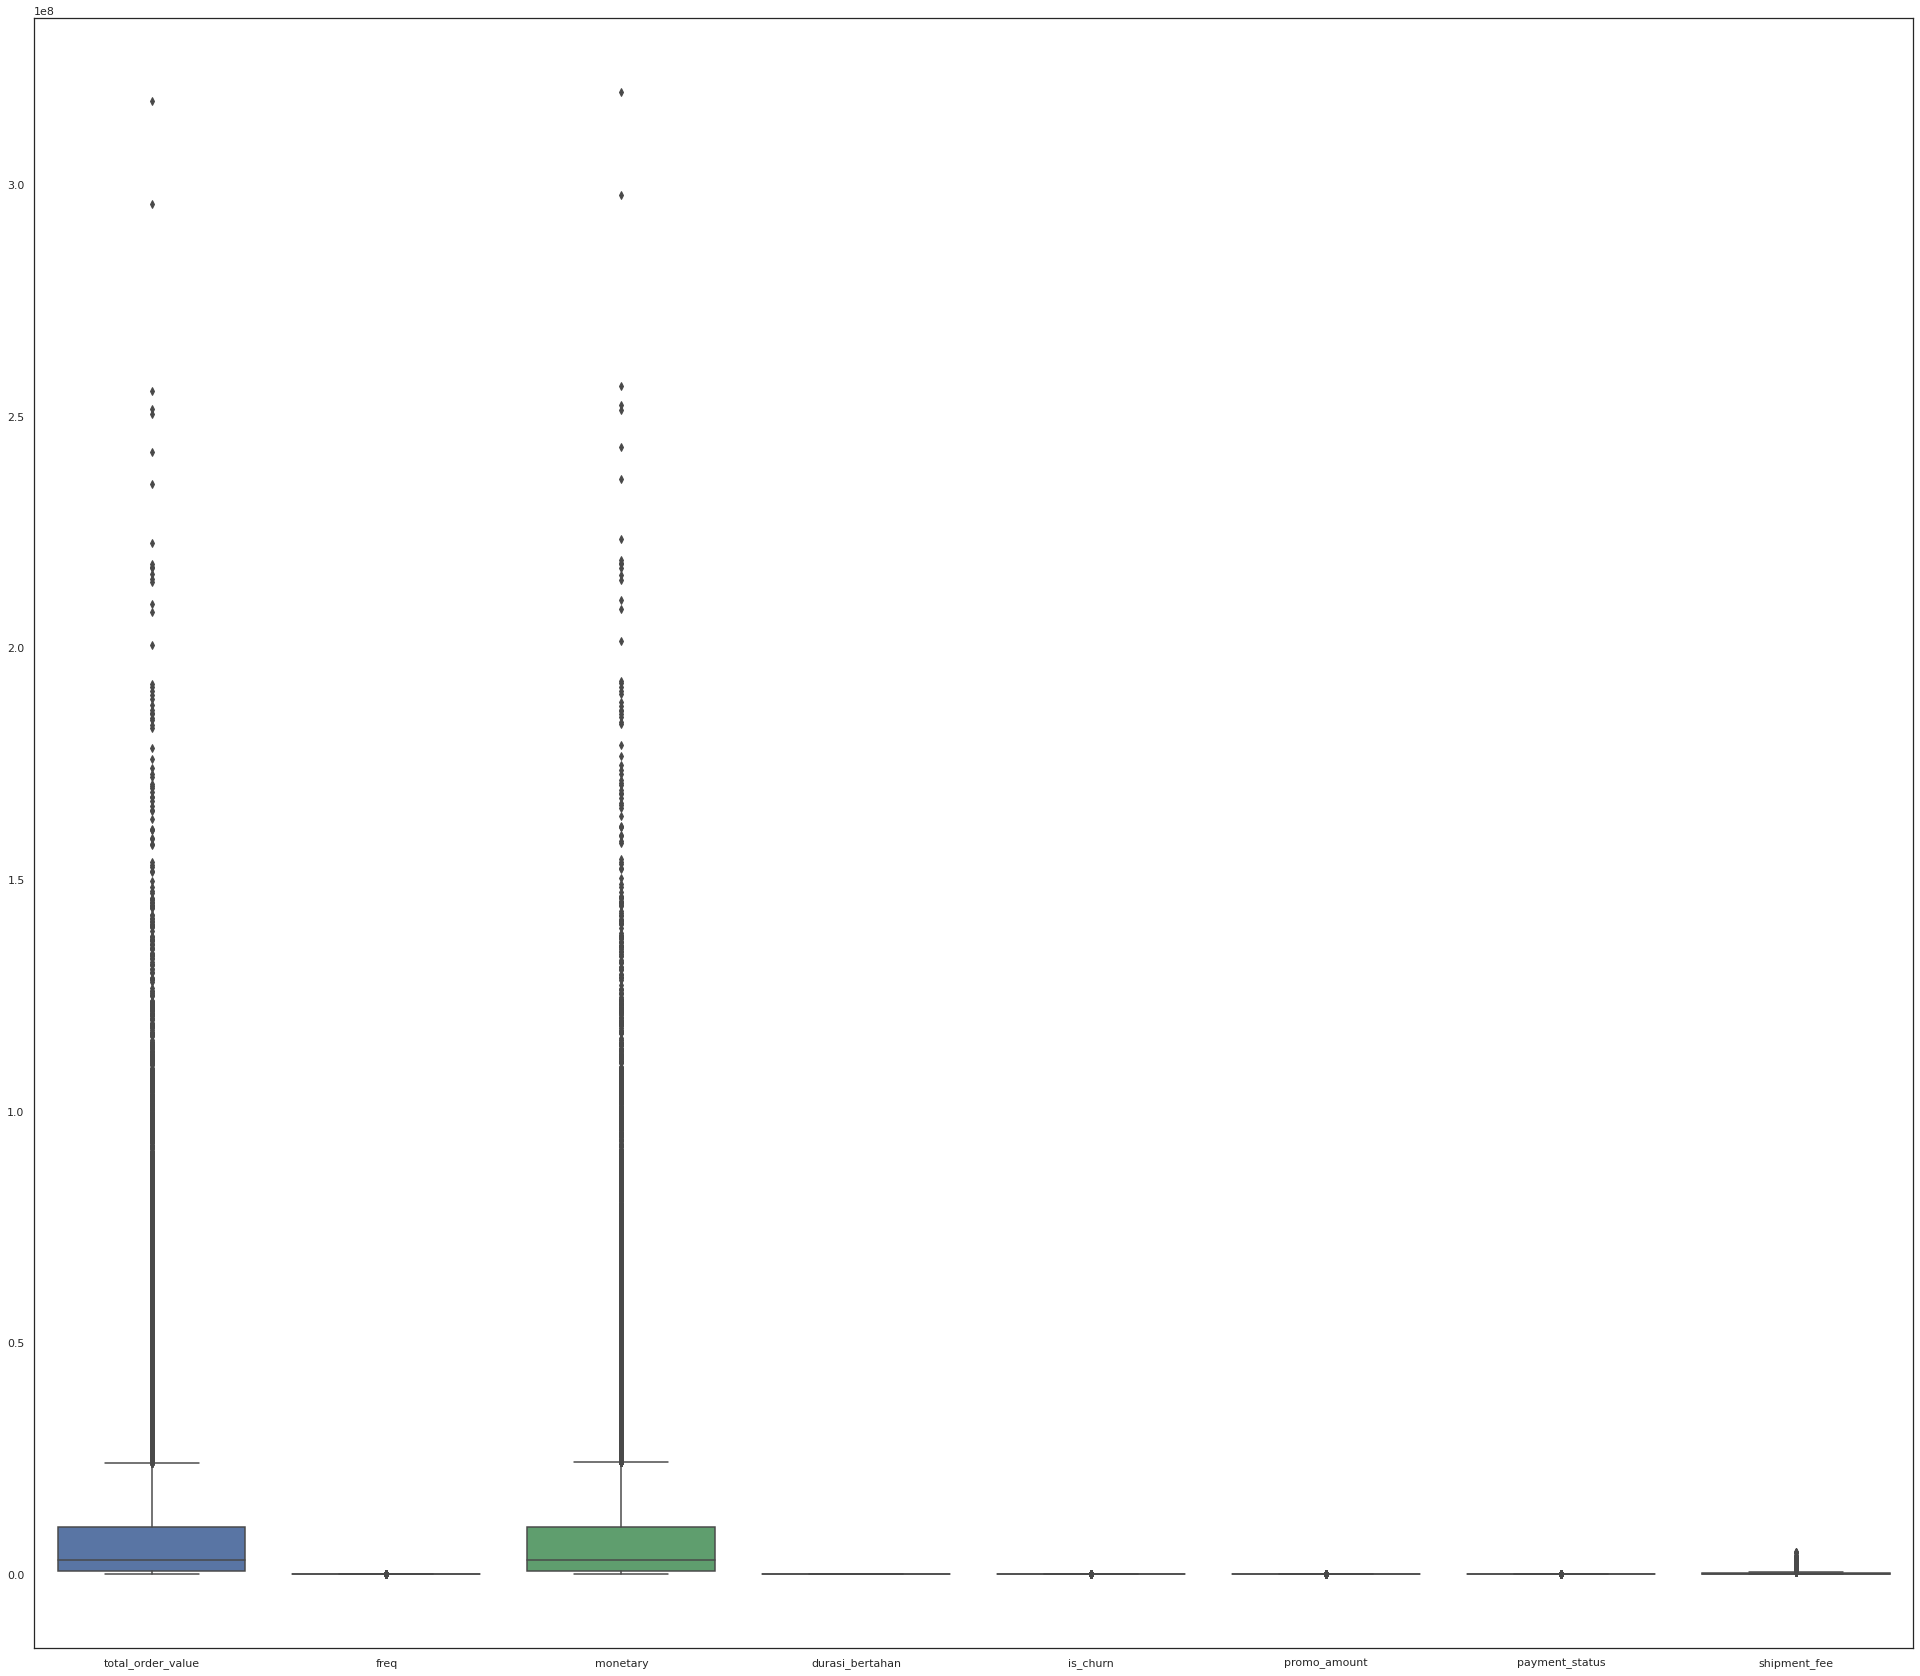

In [107]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_final)

In [108]:
# Z-Score
columns = list(df_final.columns.values)

for i in columns:
    upper_limit = df_final[i].mean() + 3*df_final[i].std()
    lower_limit = df_final[i].mean() - 3*df_final[i].std()

    df_final[i] = np.where(
        df_final[i]>upper_limit,
        upper_limit,
        np.where(
            df_final[i]<lower_limit,
            lower_limit,
            df_final[i]
        )
    )

<AxesSubplot:>

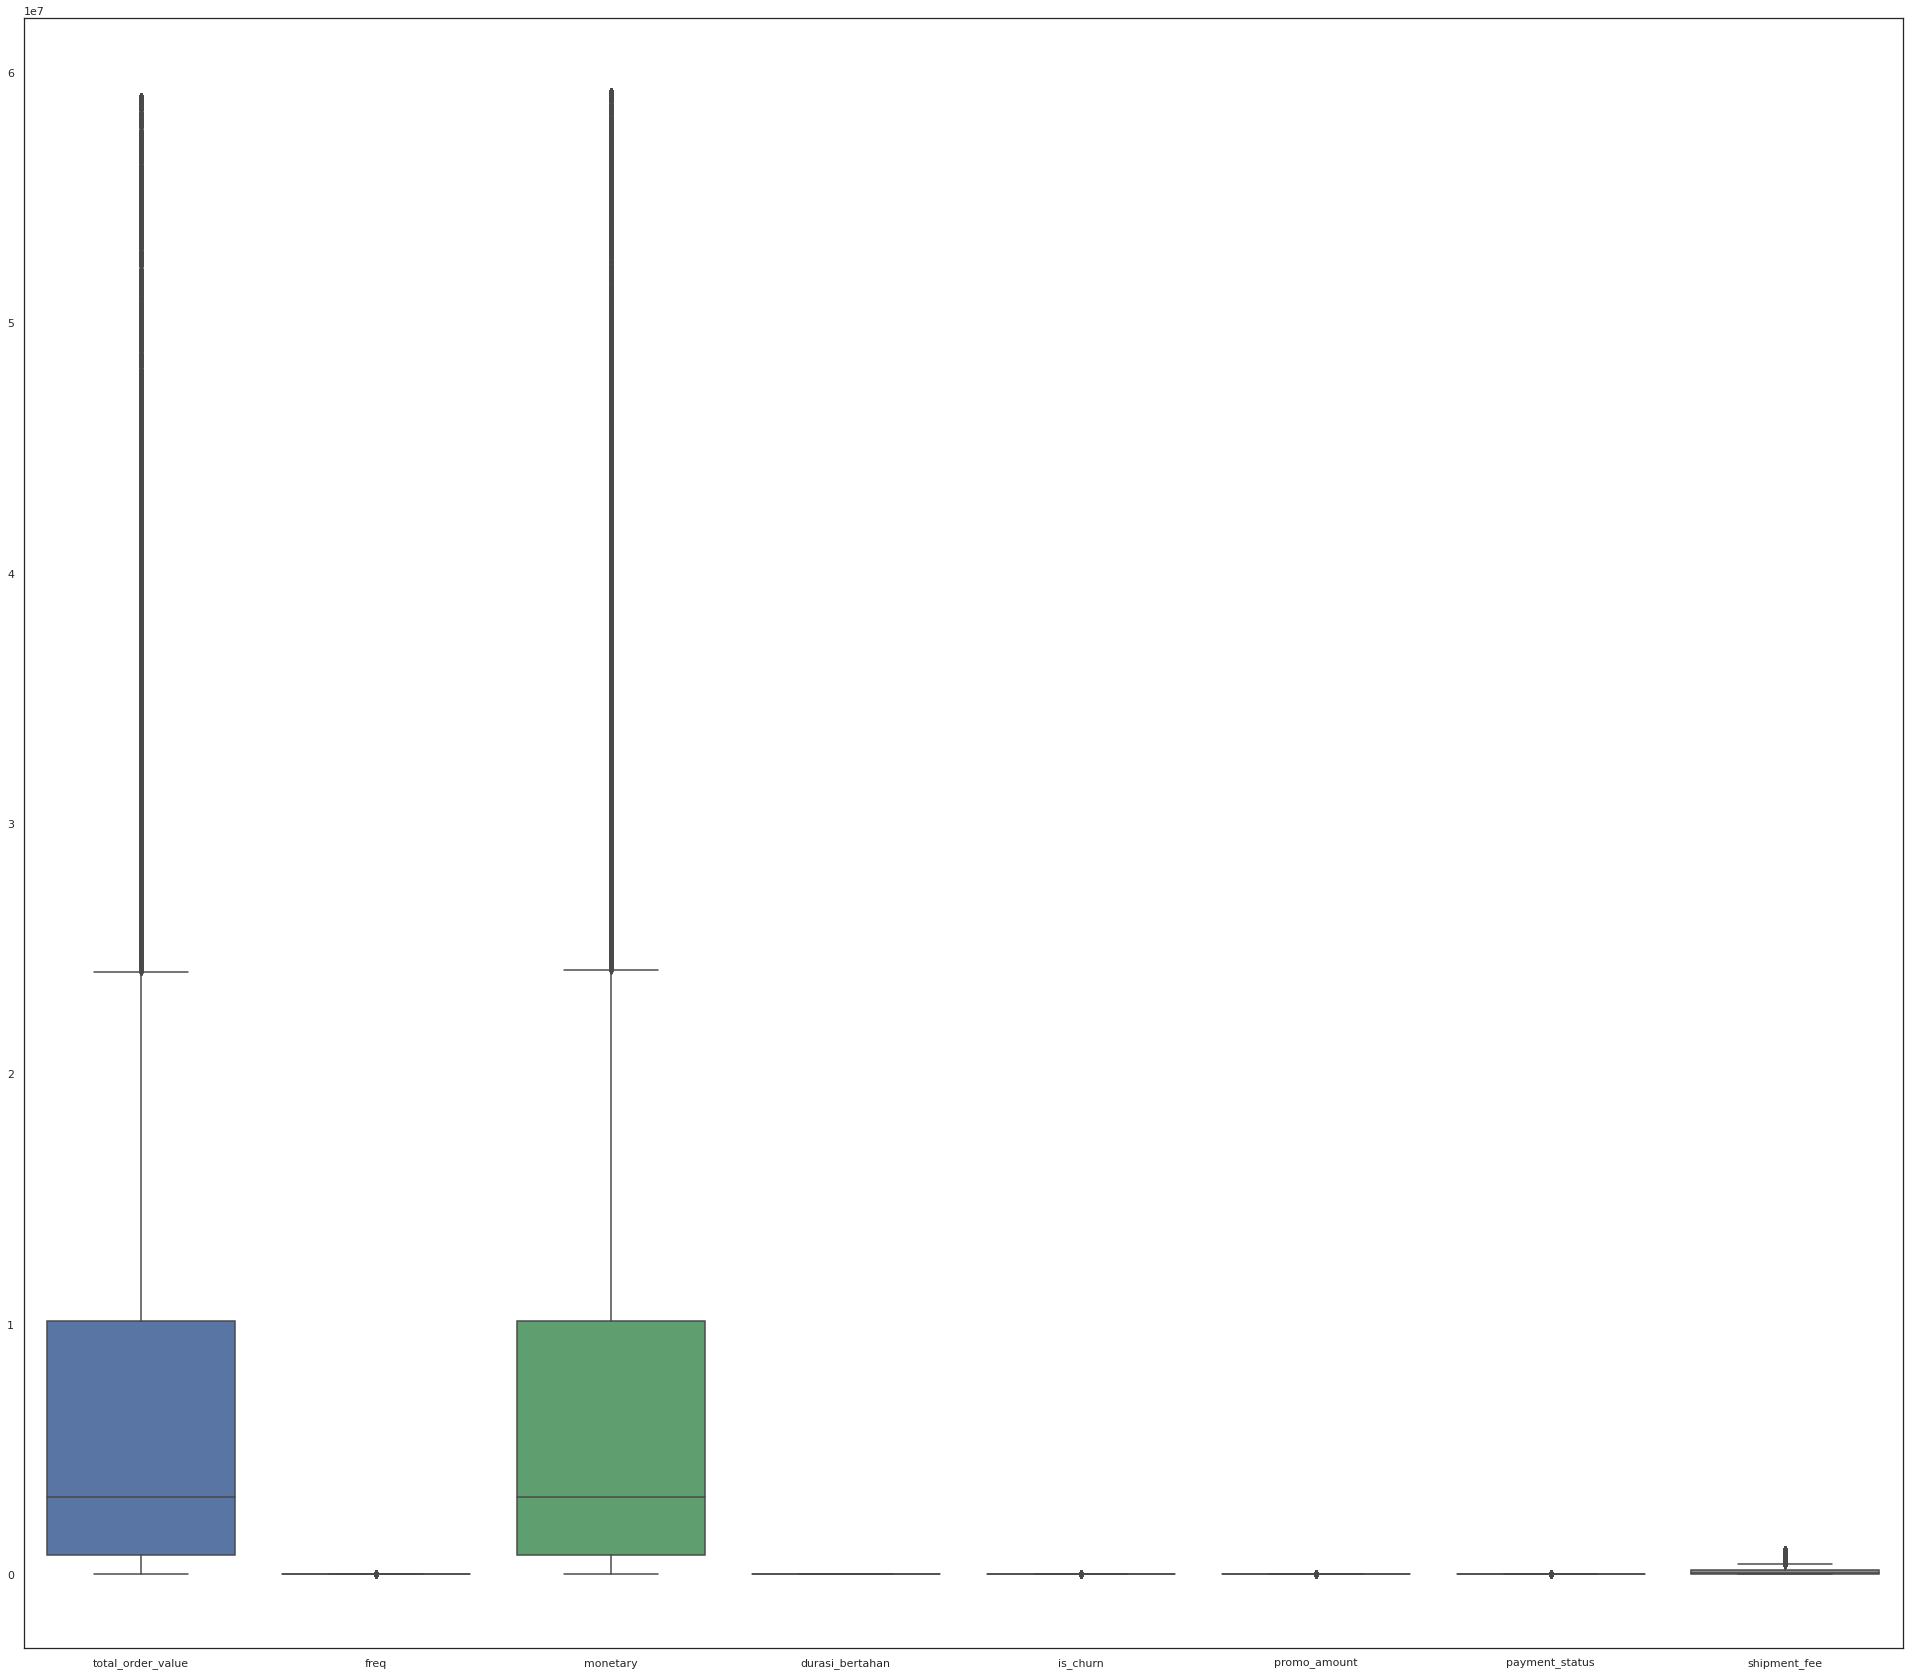

In [109]:
# Cek outlier Box Plot
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=df_final)

<AxesSubplot:>

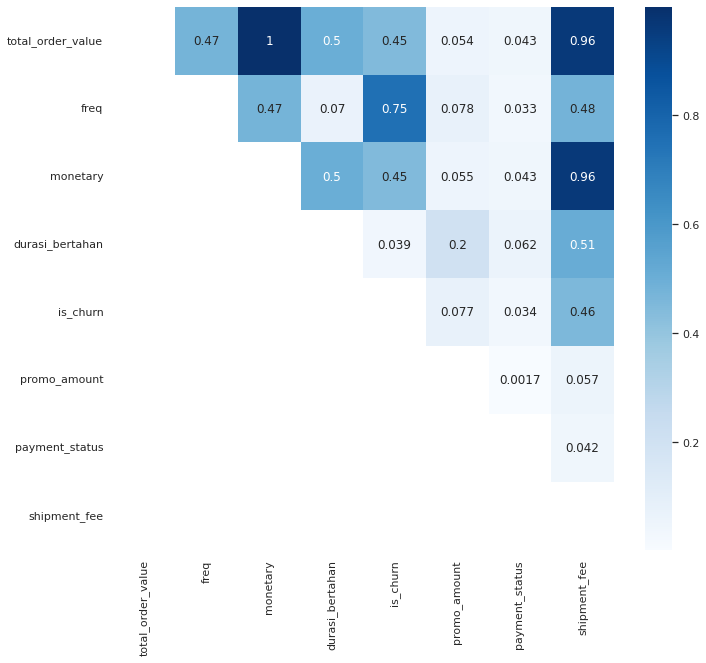

In [110]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

In [111]:
df_final=df_final.drop(columns = ['shipment_fee','total_order_value'])

<AxesSubplot:>

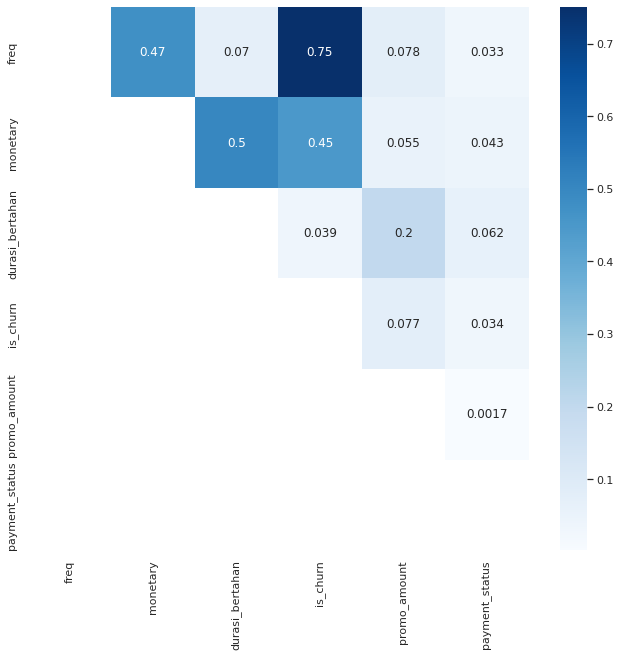

In [112]:
# Create correlation matrix
corr_matrix = df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(10,10))
sns.heatmap(upper, annot=True, cmap='Blues')

# Modelling

In [113]:
# Memisahkan mana X dan mana y
y= df_final['is_churn']
X= df_final.drop(['is_churn'],1)
X.head()

,freq,monetary,durasi_bertahan,promo_amount,payment_status
0,9.542360e-23,199832.0,1.0,1415.000000,1.000000
1,2.051846e-01,15038702.0,1412.0,2129.161290,1.000000
2,1.111567e+00,47553651.0,1441.0,1814.917526,0.979381
3,9.217313e-23,195705.0,0.0,0.000000,1.000000
4,4.676486e-08,545304.0,977.0,3482.666667,1.000000


In [114]:
y

0        1.0
1        1.0
2        0.0
3        1.0
4        1.0
        ... 
50700    1.0
50701    1.0
50702    1.0
50703    1.0
50704    1.0
Name: is_churn, Length: 50705, dtype: float64

In [115]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [116]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

In [117]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [143]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [
            DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
#             SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier
            ]

model_name = [
        'DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
#             'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier'
             ]
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9847155112907997], 1 of KFold 5
DecisionTreeClassifier Recall: [0.9897492898604422], 1 of KFold 5
DecisionTreeClassifier Precission: [0.991095720999258], 1 of KFold 5
DecisionTreeClassifier AUC: [0.9772621204683815], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9847155112907997], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9897492898604422], 2 of KFold 5
DecisionTreeClassifier Precission: [0.991095720999258], 2 of KFold 5
DecisionTreeClassifier AUC: [0.9772

In [144]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
8,XGBClassifier,0.999384,0.990573,0.995100,0.993083,0.986857,0.008811
5,RandomForestClassifier,1.000000,0.988226,0.994496,0.990737,0.984510,0.011774
6,GradientBoostingClassifier,0.989952,0.987970,0.994593,0.990317,0.984496,0.001982
7,ExtraTreesClassifier,1.000000,0.987496,0.993462,0.990860,0.982518,0.012504
0,DecisionTreeClassifier,1.000000,0.985307,0.990787,0.990811,0.977162,0.014693
3,GaussianNB,0.830889,0.830963,0.853077,0.952300,0.651393,0.000074
2,KNeighborsClassifier,0.861074,0.804694,0.852118,0.914011,0.642911,0.056380
4,LinearSVC,0.782216,0.783059,0.795560,0.979746,0.491977,0.000843
1,LogisticRegression,0.705483,0.705059,0.848993,0.766834,0.613637,0.000424


In [145]:
y.value_counts()

1.0    40482
0.0    10223
Name: is_churn, dtype: int64

In [146]:
import warnings
warnings.filterwarnings('ignore')

# Hyperparameter Tuning

In [147]:
#Grid Search
from sklearn.model_selection import GridSearchCV

In [148]:
#Grid Search RandomForestClassifier


model = RandomForestClassifier()

param = dict()
param['n_estimators']= [100]
param['criterion'] = ['entropy', 'gini']
param['bootstrap'] = [True, False]
param['max_depth'] = [6]
param['max_features'] = ['auto', 'sqrt']

cv = StratifiedKFold(n_splits=5)
clfRF = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfRF.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.981 total time=   6.3s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.987 total time=   6.2s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.981 total time=   6.3s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.983 total time=   6.5s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.980 total time=   6.1s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.981 total time=   6.3s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=6, max_features=auto, n_estimators=100;, score=0.985 total time=   6.4s
[CV 3/5] END bootstrap=True, c

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'], 'max_depth': [6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100]},
             scoring='accuracy', verbose=4)

In [149]:
print('Best Score: {}'.format(clfRF.best_score_))
print('Best Hyperparameters: {}'.format(clfRF.best_params_))

Best Score: 0.983985800216941
Best Hyperparameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}


In [150]:
#Grid Search GradientBoosting


model = GradientBoostingClassifier()

param = dict()
param['loss']= ["deviance"]
param['learning_rate'] = [0.025, 0.075, 0.2]
param['criterion'] = ["friedman_mse"]
param['max_depth'] = [3, 8]
param['n_estimators'] = [10]

cv = StratifiedKFold(n_splits=5)
clfGB = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfGB.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.798 total time=   0.9s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.798 total time=   0.9s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.798 total time=   1.0s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.798 total time=   1.0s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=3, n_estimators=10;, score=0.798 total time=   1.0s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, n_estimators=10;, score=0.798 total time=   1.7s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.025, loss=deviance, max_depth=8, n_estimators=10;, score=0.798 total time=   

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'],
                         'learning_rate': [0.025, 0.075, 0.2],
                         'loss': ['deviance'], 'max_depth': [3, 8],
                         'n_estimators': [10]},
             scoring='accuracy', verbose=4)

In [151]:
print('Best Score: {}'.format(clfGB.best_score_))
print('Best Hyperparameters: {}'.format(clfGB.best_params_))

Best Score: 0.9885021201064983
Best Hyperparameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 10}


In [152]:
#Grid Search XGBClassifier


model = XGBClassifier()

param = dict()
param['min_child_weight']= [1, 10]
param['gamma'] = [1, 2]
# param['subsample'] = [0.6, 1.0]
# param['colsample_bytree'] = [0.3, 1.0]
param['max_depth'] = [4, 5]

cv = StratifiedKFold(n_splits=5)
clfXGB = GridSearchCV(model,param,  scoring='accuracy', n_jobs=-1, cv=cv, verbose = 4)
clfXGB.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.986 total time=   4.2s
[CV 2/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.988 total time=   4.3s
[CV 4/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.992 total time=   4.3s
[CV 3/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.989 total time=   4.4s
[CV 1/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.987 total time=   3.9s
[CV 2/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.987 total time=   3.9s
[CV 3/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.989 total time=   4.0s
[CV 5/5] END gamma=1, max_depth=4, min_child_weight=1;, score=0.989 total time=   4.3s
[CV 5/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.989 total time=   3.9s
[CV 4/5] END gamma=1, max_depth=4, min_child_weight=10;, score=0.992 total time=   4.1s
[CV 1/5] END gamma=1, max_depth=5, min_child_weight=1;, score=0.9

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interacti...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                

In [153]:
print('Best Score: {}'.format(clfXGB.best_score_))
print('Best Hyperparameters: {}'.format(clfXGB.best_params_))

Best Score: 0.9888768366038851
Best Hyperparameters: {'gamma': 1, 'max_depth': 5, 'min_child_weight': 1}


In [154]:
#Train-Test Split
from sklearn.model_selection import train_test_split

In [155]:
#Pisahin X, y jadi X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (40564, 5)
y_train dataset shape:  (40564,)
X_test dataset shape:  (10141, 5)
y_test dataset shape:  (10141,)


In [156]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = XGBClassifier(**clfXGB.best_params_)

In [157]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

In [158]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      8217
         1.0       1.00      1.00      1.00     32347

    accuracy                           1.00     40564
   macro avg       0.99      1.00      0.99     40564
weighted avg       1.00      1.00      1.00     40564



In [159]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2006
         1.0       1.00      0.99      0.99      8135

    accuracy                           0.99     10141
   macro avg       0.98      0.99      0.98     10141
weighted avg       0.99      0.99      0.99     10141



# Feature Importance

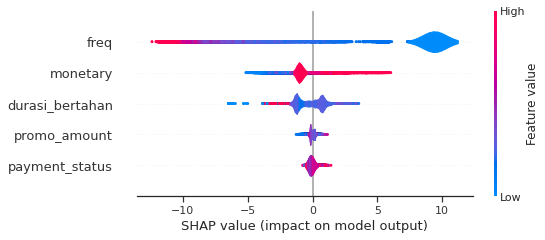

In [160]:
import shap

shap_values = shap.TreeExplainer(model_fit).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="violin")

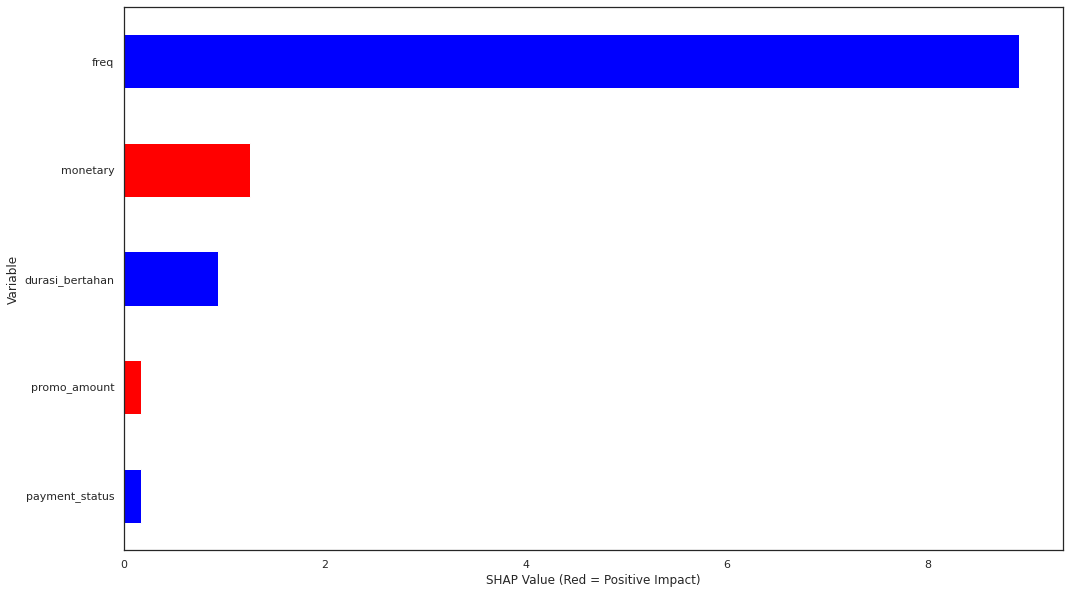

In [161]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',figsize=(15, 10),color = colorlist,legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,X_train)

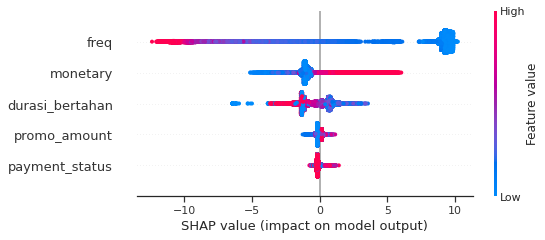

In [162]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)
#f.savefig("/summary_plot1.png", bbox_inches='tight', dpi=600)

Berdasarkan karakteristik diatas maka
1. Semakin tinggi nilai `freq` semakin rendah churn rate
2. Semakin tinggi nilai `monetary` semakin tinggi churn rate
3. Semakin tinggi nilai `durasi_bertahan` semakin rendah churn rate
4. Semakin tinggi nilai `total_order_value` semakin tinggi churn rate
5. Semakin tinggi nilai `payment_status` semakin rendah churn rate
6. Semakin tinggi nilai `promo_amount` semakin tinggi churn rate

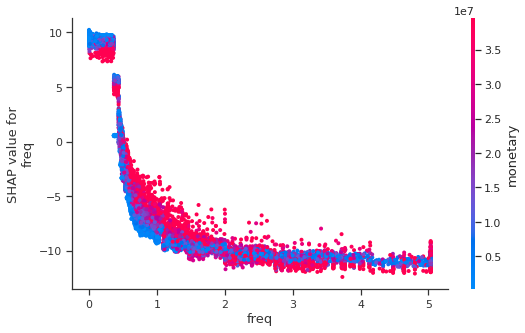

In [163]:
shap.dependence_plot('freq', shap_values, X_train)

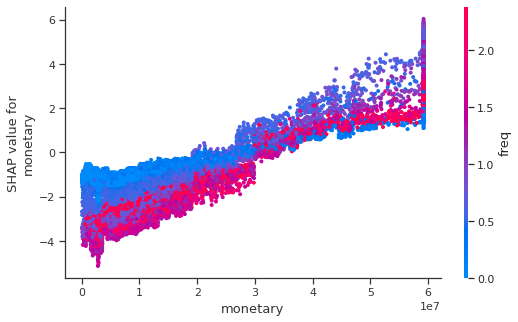

In [164]:
shap.dependence_plot('monetary', shap_values, X_train)

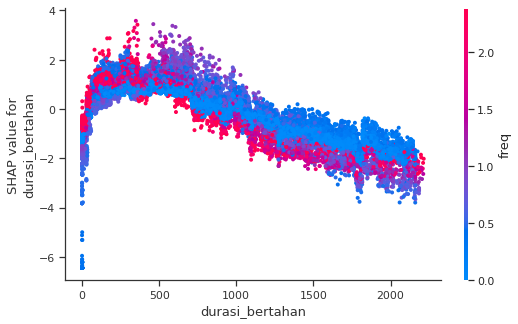

In [165]:
shap.dependence_plot('durasi_bertahan', shap_values, X_train)

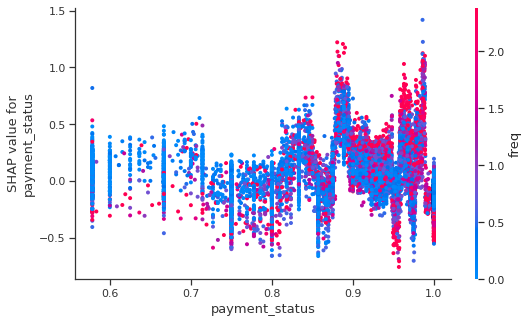

In [166]:
shap.dependence_plot('payment_status', shap_values, X_train)

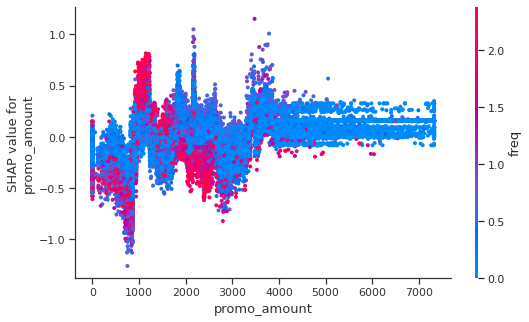

In [167]:
shap.dependence_plot('promo_amount', shap_values, X_train)